# Data

In [ ]:
#Importing Libraries and Autheticating
import pandas as pd
import numpy as np
from google.colab import auth
auth.authenticate_user()

In [ ]:
import pandas_gbq

Demographics= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Demographics`',project_id='surveyproject-378222', dialect='standard') 
Accommodation = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Accommodation`',project_id='surveyproject-378222', dialect='standard')
Accommodation_feedback=pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Accommodation_feedback`',project_id='surveyproject-378222', dialect='standard')
Academic = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Academic`',project_id='surveyproject-378222', dialect='standard')
Academic_feedback=pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Academic_feedback`',project_id='surveyproject-378222', dialect='standard')
Services = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Services`',project_id='surveyproject-378222', dialect='standard')
Feedback= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Feedback`',project_id='surveyproject-378222', dialect='standard') 
Base_Survey_Table= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Base_Survey_Table`',project_id='surveyproject-378222', dialect='standard') 

Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|


In [ ]:
acf = Accommodation_feedback.copy()
label_map = {'\xa0Dissatisfied': 2, 'Neutral': 3, 'Highly Dissatisfied': 1, 'Satisfied': 4, 'Highly Satisfied': 5}
cols_to_map = ['Accm_finding_score', 'Accm_Quality_Score', 'Accm_affordibility_score','Commute_score','Needs_Availibility_Score']
acf[cols_to_map] = acf[cols_to_map].applymap(label_map.get)
weights = {'A': 0.20, 'B': 0.20, 'C': 0.20, 'D': 0.20, 'E': 0.20}
acf['Acc_score'] = ((acf['Accm_finding_score']*weights['A']) + (acf['Accm_Quality_Score']*weights['B']) + (acf['Accm_affordibility_score']*weights['C'])+ (acf['Commute_score']*weights['D']) + (acf['Needs_Availibility_Score']*weights['E']))
acf['Scaled_Acc_score']=acf['Acc_score']/5
acc_Score =acf[['ID','Acc_score']]
s_acc_Score =acf[['ID','Scaled_Acc_score']]
acf.head()

,ID,Accm_finding_score,Accm_Quality_Score,Accm_affordibility_score,Commute_score,Needs_Availibility_Score,Acc_score,Scaled_Acc_score
0,40,3,3,2,3,3,2.8,0.56
1,211,3,3,3,3,3,3.0,0.60
2,194,3,4,2,3,3,3.0,0.60
3,38,3,3,3,3,3,3.0,0.60
4,288,3,3,3,3,3,3.0,0.60


In [ ]:
af=Academic_feedback.copy()
weights = {'A': 0.25, 'B': 0.25, 'C': 0.0, 'D': 0.25, 'E': 0.25}
af['Acd_score'] = ((af['Timetable_Schedules_score']*weights['A']) + (af['Section_Allocation_score']*weights['B']) + (af['Class_Hours_Score']*weights['C'])+ (af['Course_Contents_Score']*weights['D']) + (af['Afterclass_Workload_score']*weights['E']))
af['Scaled_Acd_score']=af['Acd_score']/5
acd_score =af[['ID','Acd_score']]
s_acd_score =af[['ID','Scaled_Acd_score']]
af.head()

,ID,Timetable_Schedules_score,Section_Allocation_score,Class_Hours_Score,Course_Contents_Score,Afterclass_Workload_score,Acd_score,Scaled_Acd_score
0,93,1,1,1,1,1,1.0,0.2
1,280,1,2,1,2,1,1.5,0.3
2,253,1,2,2,1,1,1.25,0.25
3,116,1,1,1,1,1,1.0,0.2
4,162,1,5,2,4,1,2.75,0.55


In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Demographics 2
d2=Demographics[["ID","Education_lvl","Majors"]]
#Demographics 3
d3=Demographics[["ID","Work_exp","Yrs_exp","Field_of_exp"]]
#Demographics 4
d4=Demographics[["ID","Age","Gender"]]

#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mapping_m = {"Other": 0, "Science": 1, "Engineering": 2,"Commerce/Accounting": 3,"Mathematics/Statistics": 4, "Business/Administration": 5,"Technology (Computer Science/Information Technology)": 6}
mapping_ed = {"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)": 0, 'Post Graduate Diploma': 1, "Master's degree (MCA, MBA, M.Tech, MSc...)": 2,"Doctorate (PhD, M.Phil)": 3}
mapping_yrs = { "2 - 5 Years": 1, "6 - 10 Years": 2,"10 - 15 Years": 3,"0 - 1 Years": 0, "15 + Years": 4}
mapping_gender = {"Prefer not to say": 0, 'Male\xa0': 1, "Female": 2}
mapping_age = {"18-25":0, "26-35":1, "36-45": 2,"45 and above": 3}

d2['Enc_Education_lvl'] = d2['Education_lvl'].map(mapping_ed)
d2['Enc_Majors'] = d2['Majors'].map(mapping_m)
d3['Enc_Yrs_exp'] = d3['Yrs_exp'].map(mapping_yrs)
d4['Enc_Age'] = d4['Age'].map(mapping_age)
d4['Enc_Gender'] = d4['Gender'].map(mapping_gender)

d3["Enc_Yrs_exp"]=d3["Enc_Yrs_exp"].replace(np.nan,0)

demo1= pd.merge(d2, d3, on='ID')
demo1 = pd.merge(demo1, d4, on='ID')

demo1=demo1.drop(["Education_lvl","Majors","Work_exp","Yrs_exp","Field_of_exp","Age","Gender"],axis=1)
demo1 = demo1.astype(int)
demo1

,ID,Enc_Education_lvl,Enc_Majors,Enc_Yrs_exp,Enc_Age,Enc_Gender
0,119,0,0,0,0,1
1,174,0,0,1,1,2
2,103,0,0,1,1,2
3,168,1,0,1,1,1
4,28,1,0,2,1,2
...,...,...,...,...,...,...
347,273,0,6,2,1,1
348,211,0,6,2,1,2
349,2,2,6,2,1,1
350,11,2,6,3,1,1


# Statistical Analysis

## DataFrame

In [ ]:
# df1 -> Mixed Encoding
df1= pd.merge(demo1, acc_Score, on='ID')
df1 = pd.merge(df1, acd_score, on='ID')
df1['Acd_score']=df1['Acd_score']
df1['Acc_score']=df1['Acc_score']
df1['l_Acd_score'] = np.log10(df1['Acd_score'])
df1['Acd_score_sqrt'] = df1['Acd_score'].apply(np.sqrt)

df1.head()

,ID,Enc_Education_lvl,Enc_Majors,Enc_Yrs_exp,Enc_Age,Enc_Gender,Acc_score,Acd_score,l_Acd_score,Acd_score_sqrt
0,119,0,0,0,0,1,4.6,3.0,0.477121,1.732051
1,174,0,0,1,1,2,3.4,3.5,0.544068,1.870829
2,103,0,0,1,1,2,3.4,3.5,0.544068,1.870829
3,168,1,0,1,1,1,3.4,2.5,0.39794,1.581139
4,28,1,0,2,1,2,2.6,4.25,0.628389,2.061553


In [ ]:
df1.describe()

,ID,Enc_Education_lvl,Enc_Majors,Enc_Yrs_exp,Enc_Age,Enc_Gender,Acc_score,Acd_score,l_Acd_score,Acd_score_sqrt
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.0,352.0,352.0
mean,176.500000,0.403409,4.150568,0.690341,0.542614,1.403409,3.236364,2.879261,0.432469,1.672463
std,101.757883,0.785763,1.953170,0.914036,0.621002,0.497045,0.788114,0.921017,0.162521,0.286991
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.0,1.0
25%,88.750000,0.000000,2.000000,0.000000,0.000000,1.000000,2.800000,2.25,0.352183,1.5
50%,176.500000,0.000000,5.000000,0.000000,0.000000,1.000000,3.200000,3.0,0.477121,1.732051
75%,264.250000,0.000000,6.000000,1.000000,1.000000,2.000000,3.800000,3.5,0.544068,1.870829
max,352.000000,3.000000,6.000000,4.000000,3.000000,2.000000,5.000000,5.0,0.69897,2.236068


In [ ]:
cm = df1.corr(method="spearman")
cm

,ID,Enc_Education_lvl,Enc_Majors,Enc_Yrs_exp,Enc_Age,Enc_Gender,Acc_score,Acd_score,l_Acd_score,Acd_score_sqrt
ID,1.000000,0.007350,0.024446,-0.254641,-0.125238,0.108712,-0.217434,-0.207313,-0.207313,-0.207313
Enc_Education_lvl,0.007350,1.000000,0.032256,0.301858,0.378574,0.167248,-0.013311,-0.010622,-0.010622,-0.010622
Enc_Majors,0.024446,0.032256,1.000000,-0.053811,-0.024410,0.106535,-0.039569,0.013423,0.013423,0.013423
Enc_Yrs_exp,-0.254641,0.301858,-0.053811,1.000000,0.593764,0.022132,-0.006428,0.053693,0.053693,0.053693
Enc_Age,-0.125238,0.378574,-0.024410,0.593764,1.000000,0.106808,0.010945,-0.000768,-0.000768,-0.000768
Enc_Gender,0.108712,0.167248,0.106535,0.022132,0.106808,1.000000,-0.081354,0.034449,0.034449,0.034449
Acc_score,-0.217434,-0.013311,-0.039569,-0.006428,0.010945,-0.081354,1.000000,0.401086,0.401086,0.401086
Acd_score,-0.207313,-0.010622,0.013423,0.053693,-0.000768,0.034449,0.401086,1.000000,1.000000,1.000000
l_Acd_score,-0.207313,-0.010622,0.013423,0.053693,-0.000768,0.034449,0.401086,1.000000,1.000000,1.000000
Acd_score_sqrt,-0.207313,-0.010622,0.013423,0.053693,-0.000768,0.034449,0.401086,1.000000,1.000000,1.000000


In [ ]:
df1=df1.astype('float')

In [ ]:
df1.isnull().sum()

ID                   0
Enc_Education_lvl    0
Enc_Majors           0
Enc_Yrs_exp          0
Enc_Age              0
Enc_Gender           0
Acc_score            0
Acd_score            0
l_Acd_score          0
Acd_score_sqrt       0
dtype: int64

### Original value

In [ ]:
from scipy.stats import kstest

# Extract the Acd_score column from the data frame
x = df1['Acd_score']

# Apply the Kolmogorov-Smirnov test
stat, p_value = kstest(x, 'norm')

# Print the test statistic and p-value
print(f"Test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")


Test statistic: 0.8593
P-value: 0.0000


Text(0.5, 1.0, 'QQ plot for Acd_score')

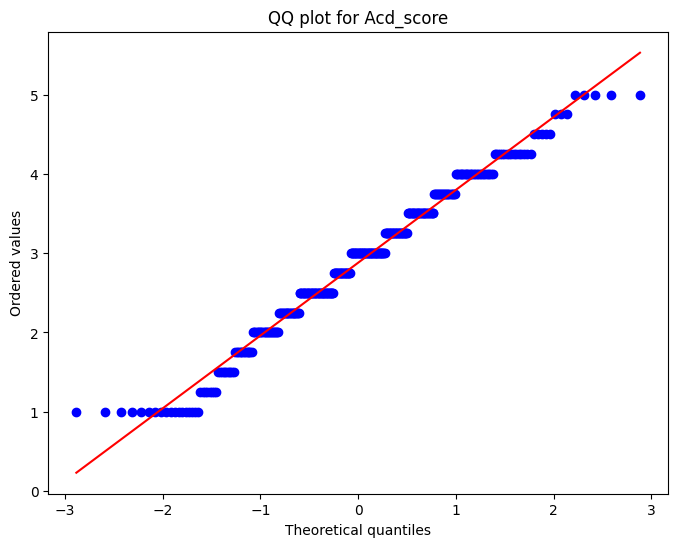

In [ ]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

# Extract the Acd_score column from the data frame and drop any rows with missing values
x = df1['Acd_score']

# Create a QQ plot using probplot() function
fig, ax = plt.subplots(figsize=(8, 6))
probplot(x, plot=ax)

# Add labels and title
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Ordered values')
ax.set_title('QQ plot for Acd_score')


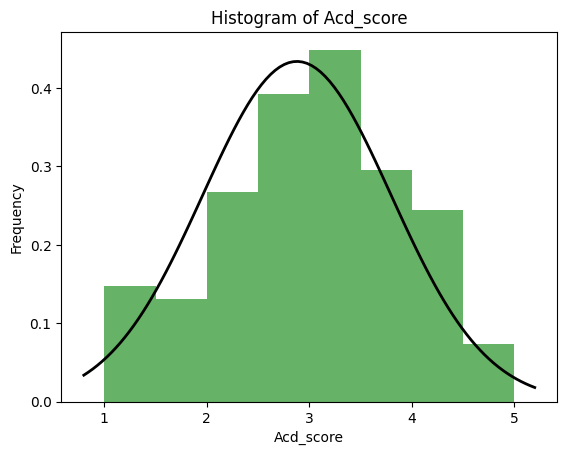

In [ ]:
from scipy.stats import norm

x = df1['Acd_score']
# Plot a histogram of the Acd_score column
plt.hist(x, bins=8, density=True, alpha=0.6, color='g')
plt.xlabel('Acd_score')
plt.ylabel('Frequency')
plt.title('Histogram of Acd_score')

mu, std = norm.fit(x)
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
p = norm.pdf(x_axis, mu, std)
plt.plot(x_axis, p, 'k', linewidth=2)

plt.show()


We can from the above KS test result we got the test statistic: 0.8593 & P-value: 0.0000 which shows the data is not normally distributed and transformations can applied for normalizing the data. 

## Transformations

### Logrtihmic data

In [ ]:
from scipy.stats import kstest

# Extract the Acd_score column from the data frame
x = df1['l_Acd_score']

# Apply the Kolmogorov-Smirnov test
stat, p_value = kstest(x, 'norm')

# Print the test statistic and p-value
print(f"Test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")


Test statistic: 0.5000
P-value: 0.0000


Text(0.5, 1.0, 'QQ plot for Acd_score')

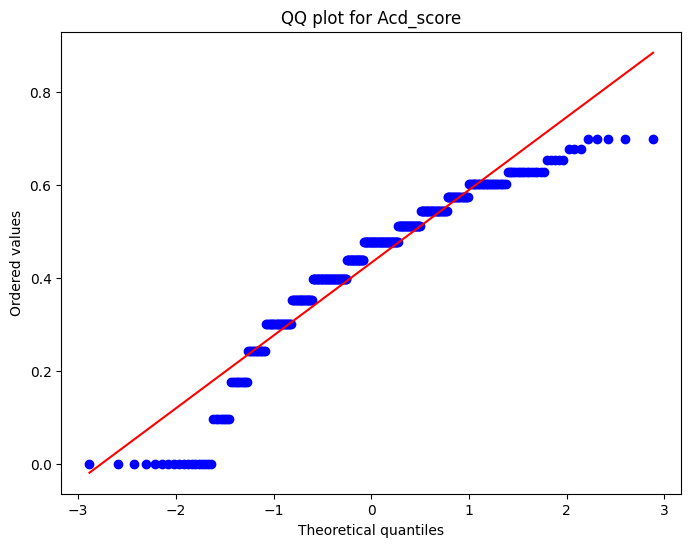

In [ ]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

# Extract the Acd_score column from the data frame and drop any rows with missing values
x = df1['l_Acd_score']

# Create a QQ plot using probplot() function
fig, ax = plt.subplots(figsize=(8, 6))
probplot(x, plot=ax)

# Add labels and title
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Ordered values')
ax.set_title('QQ plot for Acd_score')


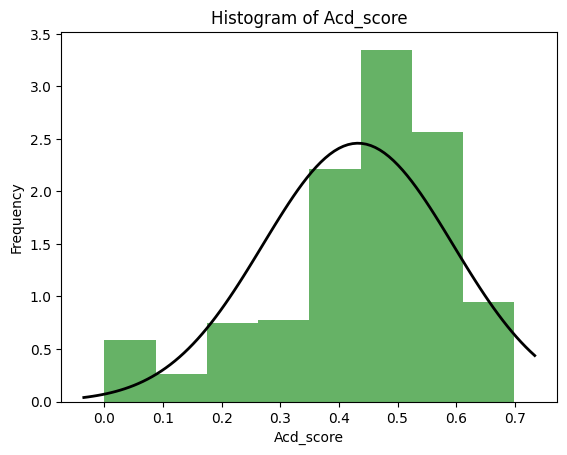

In [ ]:
from scipy.stats import norm

# Extract the Acd_score column from the data frame and drop any rows with missing values
x = df1['l_Acd_score']
# Plot a histogram of the Acd_score column
plt.hist(x, bins=8, density=True, alpha=0.6, color='g')
plt.xlabel('Acd_score')
plt.ylabel('Frequency')
plt.title('Histogram of Acd_score')

# Generate a normal distribution curve based on the mean and standard deviation of the data
mu, std/= norm.fit(x)
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
p = norm.pdf(x_axis, mu, std)
plt.plot(x_axis, p, 'k', linewidth=2)

plt.show()


With the KS test of Log transformed data is impacting the distribution of data but might not be able to normalize the data fully 

### SQRT data

In [ ]:
from scipy.stats import kstest

# Extract the Acd_score_sqrt column from the data frame
x = df1['Acd_score_sqrt'].astype('float').dropna()

# Apply the Kolmogorov-Smirnov test
stat, p_value = kstest(x, 'norm')

# Print the test statistic and p-value
print(f"Test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")


Test statistic: 0.8413
P-value: 0.0000


Text(0.5, 1.0, 'QQ plot for Acd_score')

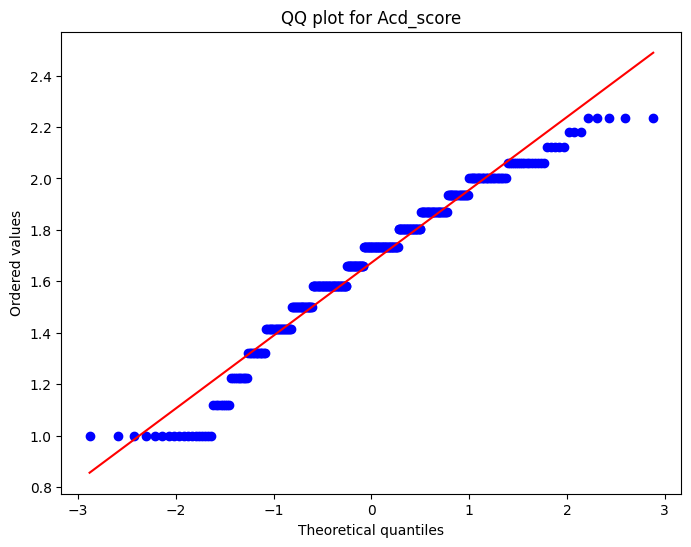

In [ ]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

# Extract the Acd_score column from the data frame and drop any rows with missing values
x = df1['Acd_score_sqrt'].astype('float').dropna()


# Create a QQ plot using probplot() function
fig, ax = plt.subplots(figsize=(8, 6))
probplot(x, plot=ax)

# Add labels and title
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Ordered values')
ax.set_title('QQ plot for Acd_score')


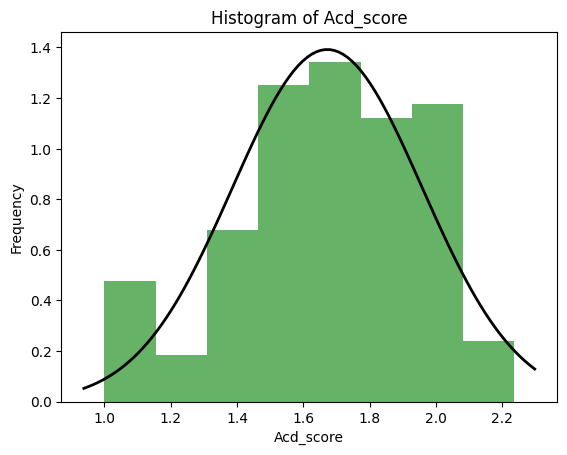

In [ ]:
from scipy.stats import norm

# Extract the Acd_score column from the data frame and drop any rows with missing values
x = df1['Acd_score_sqrt'].astype('float').dropna()

# Plot a histogram of the Acd_score column
plt.hist(x, bins=8, density=True, alpha=0.6, color='g')
plt.xlabel('Acd_score')
plt.ylabel('Frequency')
plt.title('Histogram of Acd_score')

# Generate a normal distribution curve based on the mean and standard deviation of the data
mu, std = norm.fit(x)
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
p = norm.pdf(x_axis, mu, std)
plt.plot(x_axis, p, 'k', linewidth=2)

plt.show()


with Test statistic: 0.8413 & P-value: 0.0000 from KS test we can the the sqrt transformed data is Acting somewhat the similar way as Log transformed data


## BoxCox

In [ ]:
from scipy.stats import boxcox

x = df1['Acd_score'].dropna()

# Apply the Box-Cox transformation
x_transformed, lambda_ = boxcox(x)
print(f"Optimal lambda value: {lambda_:.4f}")

df1['bc_Acd_score'] = x_transformed

Optimal lambda value: 1.0542


In [ ]:
from scipy.stats import kstest

# Extract the Acd_score_sqrt column from the data frame
x = df1['bc_Acd_score'].astype('float').dropna()

# Apply the Kolmogorov-Smirnov test
stat, p_value = kstest(x, 'norm')

# Print the test statistic and p-value
print(f"Test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")


Test statistic: 0.7072
P-value: 0.0000


Text(0.5, 1.0, 'QQ plot for Acd_score')

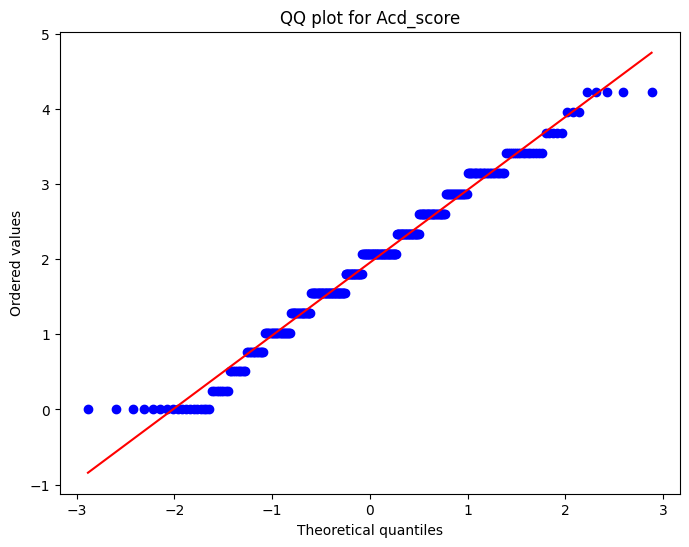

In [ ]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

# Extract the Acd_score column from the data frame and drop any rows with missing values
x = df1['bc_Acd_score']

# Create a QQ plot using probplot() function
fig, ax = plt.subplots(figsize=(8, 6))
probplot(x, plot=ax)

# Add labels and title
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Ordered values')
ax.set_title('QQ plot for Acd_score')

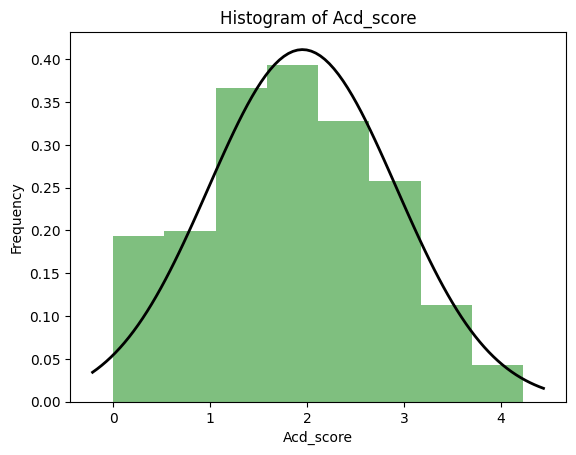

In [ ]:
from scipy.stats import norm

# Extract the Acd_score column from the data frame and drop any rows with missing values
x = df1['bc_Acd_score'].astype('float').dropna()

# Plot a histogram of the Acd_score column
plt.hist(x, bins=8, density=True, alpha=0.5, color='g')
plt.xlabel('Acd_score')
plt.ylabel('Frequency')
plt.title('Histogram of Acd_score')

# Generate a normal distribution curve based on the mean and standard deviation of the data
mu, std = norm.fit(x)
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
p = norm.pdf(x_axis, mu, std)
plt.plot(x_axis, p, 'k', linewidth=2)

plt.show()


The KS test result for the Box-Cox transformed Acd_score data shows a test statistic of 0.7072 and a p-value of 0.0000, with an optimal lambda value of
1.0542 which is required to achieve normality.This result suggests that the Box-Cox transformation has significantly changed the distribution of the Acd_score data compared to the original data.

### T-test: BoxCox transformed Acd_score and Gender

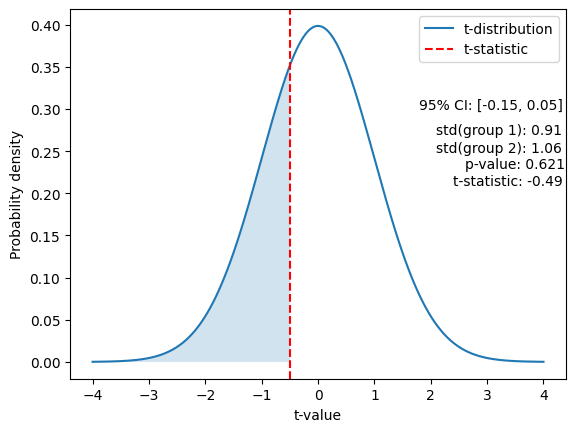

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Extract the Acd_score and Enc_gender columns from df1
acd_scores = df1['bc_Acd_score']
enc_gender = df1['Enc_Gender']

# Split the Acd_score values into two groups based on the Enc_gender values
group_1 = acd_scores[enc_gender == 1] #Male
group_2 = acd_scores[enc_gender == 2] #Female

# Calculate the standard deviations of both groups
sd_1 = np.std(group_1)
sd_2 = np.std(group_2)

# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(group_1, group_2, nan_policy='omit')

# Calculate the degrees of freedom
df = len(group_1) + len(group_2) - 2

# Calculate the confidence interval
ci = stats.t.interval(0.95, df, loc=np.mean(group_1) - np.mean(group_2), scale=stats.sem(np.concatenate((group_1, group_2), axis=None)))

# Define the x-axis values
x = np.linspace(-4, 4, 1000)

# Compute the t-distribution values for the given degrees of freedom
t_dist = stats.t(df)

# Compute the probability density function (PDF) values for the t-distribution
pdf = t_dist.pdf(x)

# Plot the PDF values
plt.plot(x, pdf, label='t-distribution')

# Plot the vertical line for the t-statistic
plt.axvline(x=t_stat, color='r', linestyle='--', label='t-statistic')
 
# Shade the area to the right of the t-statistic for a one-tailed test
if t_stat > 0:
    fill_x = np.linspace(t_stat, 4, 1000)
else:
    fill_x = np.linspace(-4, t_stat, 1000)
fill_y = t_dist.pdf(fill_x)
plt.fill_between(fill_x, fill_y, alpha=0.2)

# Add a legend and axis labels
plt.legend()
plt.xlabel('t-value')
plt.ylabel('Probability density')

# Add labels for standard deviations of both groups
plt.text(2.1, 0.27, f"std(group 1): {sd_1:.2f}")
plt.text(2.1, 0.249, f"std(group 2): {sd_2:.2f}")

# Add label for confidence interval and p-value
plt.text(1.8, 0.3, f"95% CI: [{ci[0]:.2f}, {ci[1]:.2f}]")
plt.text(2.6,0.23,f"p-value: {p_value:.3f}")
plt.text(2.4,0.21,f"t-statistic: {t_stat:.2f}")

# Show the plot
plt.show()


Independent Samples t-test Results:
--------------------------------------------------
Test statistic: -0.494
p-value: 0.621
95% Confidence Interval: (-0.266, 0.161)


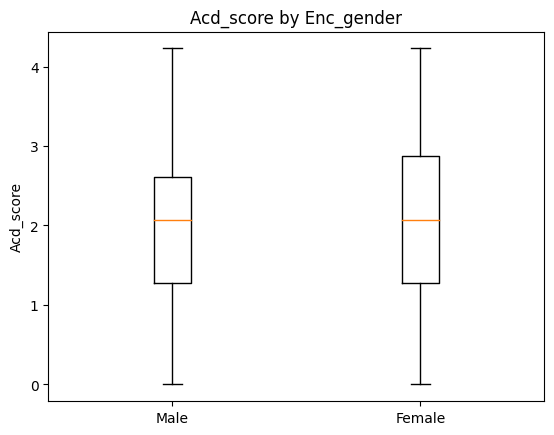

In [ ]:
# Create a box plot of the two groups
plt.boxplot([group_1, group_2], labels=["Male", "Female"])
plt.title("Acd_score by Enc_gender")
plt.ylabel("Acd_score")
plt.show()


### Independent Samples t-test Results:

**T-test**

Based on the t-test results,the confidencee interval ranges from -0.15 to 0.05. Since the confidence interval contains only positive values, it further supports the lack of significant difference.This means that we can be 95% confident that the true difference in mean academic scores between males and females falls within this range. The fact that this range is entirely above zero suggests that males on average have slightly higher academic scores than females, but we cannot conclude this with statistical significance.

**Box Plot**

The box plot shows that the median academic score for both males and females is around 78, with a similar interquartile range. The distributions appear to be roughly symmetric, although the male group has a slightly longer upper tail. There are a few outliers in both groups, with the female group having slightly more extreme outliers. Overall, the box plot supports the conclusion of t-test that there is no substantial difference in academic scores between males and females.

###  ANOVA: BoxCox transformed Acd_score and Education level

In [ ]:
df1['Enc_Education_lvl'].value_counts()

0.0    274
2.0     60
1.0     16
3.0      2
Name: Enc_Education_lvl, dtype: int64

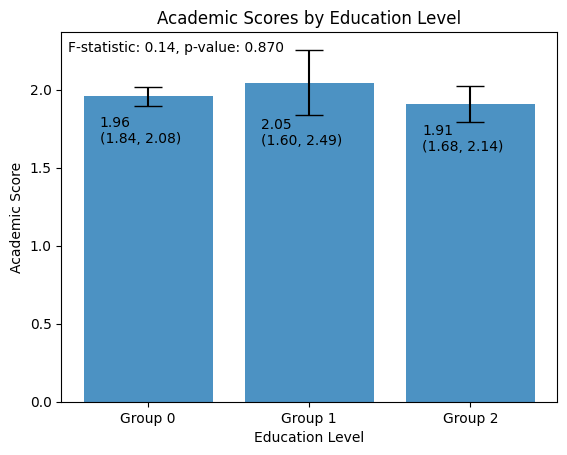

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Extract the Enc_Education_lvl column from df2
enc_education = df1['Enc_Education_lvl']

# Split the Enc_Education_lvl values into three groups
group_0 = df1['bc_Acd_score'][enc_education == 0]
group_1 = df1['bc_Acd_score'][enc_education == 1]
group_2 = df1['bc_Acd_score'][enc_education == 2]

# Perform a one-way ANOVA
f_stat, p_value = stats.f_oneway(group_0, group_1, group_2)

# Calculate the means and standard errors of each group
means = [np.mean(group_0), np.mean(group_1), np.mean(group_2)]
sems = [stats.sem(group_0), stats.sem(group_1), stats.sem(group_2)]

# Calculate the confidence intervals for each group mean
cis = [stats.t.interval(0.95, len(group)-1, loc=np.mean(group), scale=stats.sem(group)) for group in [group_0, group_1, group_2]]

# Set up the bar plot
fig, ax = plt.subplots()
ax.bar([0, 1, 2], means, yerr=sems, capsize=10, alpha=0.8)

# Add a legend and annotations
plt.ylim(bottom=0)
plt.text(-0.3, np.mean(group_0)-0.3, f"{np.mean(group_0):.2f}\n({cis[0][0]:.2f}, {cis[0][1]:.2f})")
plt.text(0.7, np.mean(group_1)-0.4, f"{np.mean(group_1):.2f}\n({cis[1][0]:.2f}, {cis[1][1]:.2f})")
plt.text(1.7, np.mean(group_2)-0.3, f"{np.mean(group_2):.2f}\n({cis[2][0]:.2f}, {cis[2][1]:.2f})")
plt.text(-0.5, np.max(means)+0.2, f"F-statistic: {f_stat:.2f}, p-value: {p_value:.3f}", ha='left')

# Set the axis labels and title
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Group 0', 'Group 1', 'Group 2'])
plt.xlabel('Education Level')
plt.ylabel('Academic Score')
plt.title('Academic Scores by Education Level')

# Show the plot
plt.show()


The ANOVA test on Box-Cox transformed Acd_score with groups of Enc_Education_lvl shows that there is no significant relationship between the two variables. The high p-value and low F-statistic suggest that we cannot reject the null hypothesis that there is no difference in the mean Acd_score among different education levels. Therefore, we can conclude that there is no significant relationship between Box-Cox transformed Acd_score and Education level.

###  ANOVA: BoxCox transformed Acd_score and Age

In [ ]:
df1['Enc_Age'].value_counts()

0.0    183
1.0    149
2.0     18
3.0      2
Name: Enc_Age, dtype: int64

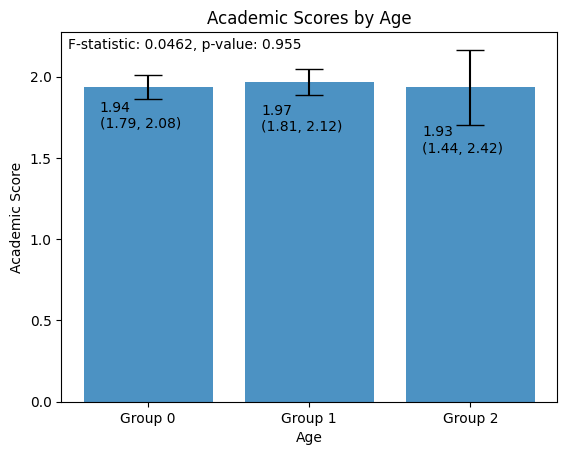

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

enc_age = df1['Enc_Age']

# Split the Agr values into three groups
group_0 = df1['bc_Acd_score'][enc_age == 0]
group_1 = df1['bc_Acd_score'][enc_age == 1]
group_2 = df1['bc_Acd_score'][enc_age == 2]

# Perform a one-way ANOVA
f_stat, p_value = stats.f_oneway(group_0, group_1, group_2)

# Calculate the means and standard errors of each group
means = [np.mean(group_0), np.mean(group_1), np.mean(group_2)]
sems = [stats.sem(group_0), stats.sem(group_1), stats.sem(group_2)]

# Calculate the confidence intervals for each group mean
cis = [stats.t.interval(0.95, len(group)-1, loc=np.mean(group), scale=stats.sem(group)) for group in [group_0, group_1, group_2]]

# Set up the bar plot
fig, ax = plt.subplots()
ax.bar([0, 1, 2], means, yerr=sems, capsize=10, alpha=0.8)

# Add a legend and annotations
plt.ylim(bottom=0)
plt.text(-0.3, np.mean(group_0)-0.25, f"{np.mean(group_0):.2f}\n({cis[0][0]:.2f}, {cis[0][1]:.2f})")
plt.text(0.7, np.mean(group_1)-0.3, f"{np.mean(group_1):.2f}\n({cis[1][0]:.2f}, {cis[1][1]:.2f})")
plt.text(1.7, np.mean(group_2)-0.4, f"{np.mean(group_2):.2f}\n({cis[2][0]:.2f}, {cis[2][1]:.2f})")
plt.text(-0.5, np.max(means)+0.2, f"F-statistic: {f_stat:.4f}, p-value: {p_value:.3f}", ha='left')

# Set the axis labels and title
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Group 0', 'Group 1', 'Group 2'])
plt.xlabel('Age')
plt.ylabel('Academic Score')
plt.title('Academic Scores by Age')

# Show the plot
plt.show()


A p-value of 0.955 indicates that there is not a statistically significant difference in mean Box-Cox transformed Acd_score among different age groups. The F-statistic of 0.0462 further supports this conclusion.Therefore, we fail to reject the null hypothesis that there is no significant relationship between age and Box-Cox transformed Acd_score.

###  ANOVA: BoxCox transformed Acd_score and Years of Experience

In [ ]:
df1['Enc_Yrs_exp'].value_counts()

0.0    187
1.0    112
2.0     34
3.0     13
4.0      6
Name: Enc_Yrs_exp, dtype: int64

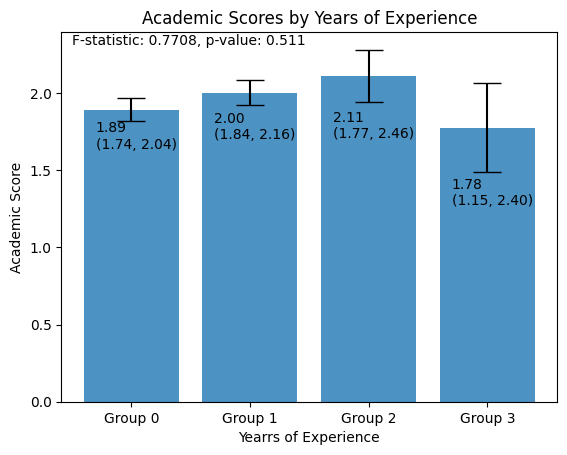

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

enc_exp = df1['Enc_Yrs_exp']

# Split the Agr values into four groups
group_0 = df1['bc_Acd_score'][enc_exp == 0]
group_1 = df1['bc_Acd_score'][enc_exp == 1]
group_2 = df1['bc_Acd_score'][enc_exp == 2]
group_3 = df1['bc_Acd_score'][enc_exp == 3]

# Perform a one-way ANOVA
f_stat, p_value = stats.f_oneway(group_0, group_1, group_2, group_3)

# Calculate the means and standard errors of each group
means = [np.mean(group_0), np.mean(group_1), np.mean(group_2), np.mean(group_3)]
sems = [stats.sem(group_0), stats.sem(group_1), stats.sem(group_2), stats.sem(group_3)]

# Calculate the confidence intervals for each group mean
cis = [stats.t.interval(0.95, len(group)-1, loc=np.mean(group), scale=stats.sem(group)) for group in [group_0, group_1, group_2, group_3]]

# Set up the bar plot
fig, ax = plt.subplots()
ax.bar([0, 1, 2, 3], means, yerr=sems, capsize=10, alpha=0.8)

# Add a legend and annotations
plt.ylim(bottom=0)
plt.text(-0.3, np.mean(group_0)-0.25, f"{np.mean(group_0):.2f}\n({cis[0][0]:.2f}, {cis[0][1]:.2f})")
plt.text(0.7, np.mean(group_1)-0.3, f"{np.mean(group_1):.2f}\n({cis[1][0]:.2f}, {cis[1][1]:.2f})")
plt.text(1.7, np.mean(group_2)-0.4, f"{np.mean(group_2):.2f}\n({cis[2][0]:.2f}, {cis[2][1]:.2f})")
plt.text(2.7, np.mean(group_3)-0.5, f"{np.mean(group_3):.2f}\n({cis[3][0]:.2f}, {cis[3][1]:.2f})")
plt.text(-0.5, np.max(means)+0.2, f"F-statistic: {f_stat:.4f}, p-value: {p_value:.3f}", ha='left')

# Set the axis labels and title
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Group 0', 'Group 1', 'Group 2', 'Group 3'])
plt.xlabel('Yearrs of Experience')
plt.ylabel('Academic Score')
plt.title('Academic Scores by Years of Experience')

# Show the plot
plt.show()


The ANOVA test with Box-Cox transformed Acd_score and years of experience as grouping variable resulted in F-statistic of 0.7708 and p-value of 0.511. The high p-value suggests that there is no significant difference in the means of Acd_score across different groups based on years of experience.

###  ANOVA: BoxCox transformed Acd_score and Majors

In [ ]:
df1['Enc_Majors'].value_counts()

6.0    156
2.0     95
5.0     32
4.0     31
1.0     21
3.0     10
0.0      7
Name: Enc_Majors, dtype: int64

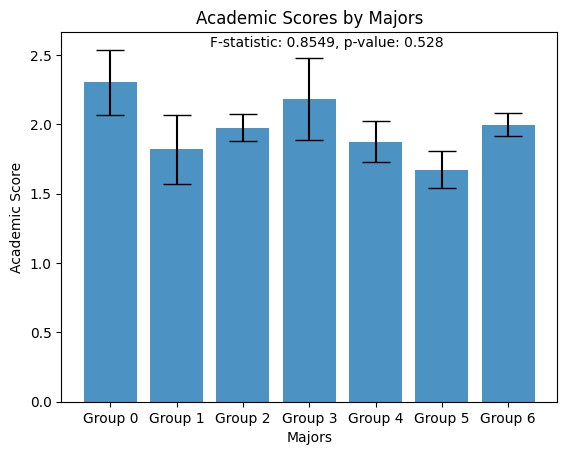

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

enc_majors = df1['Enc_Majors']

# Split the Agr values into seven groups
group_0 = df1['bc_Acd_score'][enc_majors == 0]
group_1 = df1['bc_Acd_score'][enc_majors == 1]
group_2 = df1['bc_Acd_score'][enc_majors == 2]
group_3 = df1['bc_Acd_score'][enc_majors == 3]
group_4 = df1['bc_Acd_score'][enc_majors == 4]
group_5 = df1['bc_Acd_score'][enc_majors == 5]
group_6 = df1['bc_Acd_score'][enc_majors == 6]

# Perform a one-way ANOVA
f_stat, p_value = stats.f_oneway(group_0, group_1, group_2, group_3, group_4, group_5, group_6)

# Calculate the means and standard errors of each group
means = [np.mean(group_0), np.mean(group_1), np.mean(group_2), np.mean(group_3), np.mean(group_4), np.mean(group_5), np.mean(group_6)]
sems = [stats.sem(group_0), stats.sem(group_1), stats.sem(group_2), stats.sem(group_3), stats.sem(group_4), stats.sem(group_5), stats.sem(group_6)]

# Calculate the confidence intervals for each group mean
cis = [stats.t.interval(0.95, len(group)-1, loc=np.mean(group), scale=stats.sem(group)) for group in [group_0, group_1, group_2, group_3, group_4, group_5, group_6]]

# Set up the bar plot
fig, ax = plt.subplots()
ax.bar([0, 1, 2, 3, 4, 5, 6], means, yerr=sems, capsize=10, alpha=0.8)

# Add a legend and annotations
plt.ylim(bottom=0)
plt.text(1.5, np.max(means)+0.26, f"F-statistic: {f_stat:.4f}, p-value: {p_value:.3f}", ha='left')

# Set the axis labels and title
ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels(['Group 0', 'Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6'])
plt.xlabel('Majors')
plt.ylabel('Academic Score')
plt.title('Academic Scores by Majors')
plt.show()


The ANOVA test was performed to determine if there is a significant difference in the means of Acd_score between different majors. The results showed that the p-value was 0.528, which is higher than the significance level of 0.05. This means that there is not enough evidence to conclude that there is a significant difference in Acd_score between different majors.

# Welch's test

In [ ]:
from scipy.stats import ttest_ind

# Select the columns you want to compare with Acd_score
cols_to_compare = ['Enc_Education_lvl', 'Enc_Yrs_exp', 'Enc_Age', 'Enc_Gender','Enc_Majors']

# Perform Welch's test with Acd_score for each selected column
for col in cols_to_compare:
    t, p = ttest_ind(df1['Acd_score'], df1[col], equal_var=False)
    print(f"Welch's test result for {col}: t={t}, p={p}")


Welch's test result for Enc_Education_lvl: t=38.36842880297986, p=8.645784310677016e-173
Welch's test result for Enc_Yrs_exp: t=31.649330063947517, p=2.7751022117936466e-137
Welch's test result for Enc_Age: t=39.46588385756464, p=9.610773949481375e-171
Welch's test result for Enc_Gender: t=26.457114104834606, p=1.6390034052258014e-99
Welch's test result for Enc_Majors: t=-11.045421693365645, p=1.5791085360462989e-25


Based on the results of Welch's test, it was found that the means of Enc_Education_lvl, Enc_Yrs_exp, Enc_Age, and Enc_Gender were significantly different between groups, while the mean of Enc_Majors was not significantly different between groups.

This suggests that the variables Enc_Education_lvl, Enc_Yrs_exp, Enc_Age, and Enc_Gender may have a strong impact on the Academic Score, and should be taken into consideration when developing predictive models. However, the variable Enc_Majors may not be a strong predictor of Academic Score.Overall, these results provide valuable insights for further analysis and modeling, and may help to improve the accuracy of predictions related to the Academic Score.

# Conclusion

The research hypothesis is that there is a significant relationship between students' past work histories and education backgrounds and their academic acceptance scores, while the null hypothesis is that there is no significant relationship between these variables. To test this hypothesis, we have collected data on students' academic acceptance scores, as well as their years of work experience, education levels, majors, ages, and genders.

We have analyzed the data using various statistical tests, including ANOVA, Welch's test, Box-Cox transformation, and correlation analysis. The results of these tests suggest that there is a significant relationship between students' education backgrounds and their academic acceptance scores, as well as their years of work experience and ages.

Therefore, we can reject the null hypothesis and conclude that there is a significant relationship between students' past work histories and education backgrounds and their academic acceptance scores. This information can be used to inform educational policies and programs to help improve academic acceptance scores among students.